In [ ]:
# Authenticating drive permissions
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# downloading the file from drive
downloaded = drive.CreateFile({'id':"1nJre5cbxLZ_IoQhknS7ZPo2-GlBAgp5K"})
downloaded.GetContentFile('Shopify.csv')

# Question: 1

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## EDA

In [ ]:
# Loading Data
data = pd.read_csv("Shopify.csv")
data.shape

(5000, 7)

In [ ]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We can see that mean of order_amount is 3145.128, which is indeed the calculation mentioned in the question.

Also we can see that the standard deviation of 41282.54, which means on average, the values vary from mean by this amount.

And also to mention that on comapring the medians of quartile ranges, mean and maximum value we can say that there are few outlier values that are increasing the mean value.

Therefore, from above points we can come to conclusion that ***mean is not the correct way to represent the Average Order Value of this data***.



##AOV(Average Order Value):
**The formula for AOV for past 30 days** = 

(*Total order amount spent each time a customer places the order in past 30 days*)  /   (*Total number of orders placed in past 30 days*)

Check for missing values

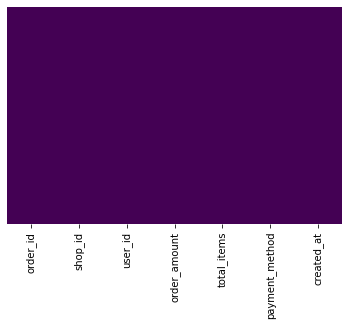

In [ ]:
# Plot for Missing Values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no missing value in the given dataset, therefore, there is no need to manage the missing values.

First, I will seperate year-month from timestamp as this will help to calculate the AOV per month

In [ ]:
# Seperating year-months from Timestamp 

data['created_month'] = data.created_at.str.split('-', n=2).str[:2].apply(lambda key: str(key[0]) + '-' + str(key[1]))
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_month
0,1,53,746,224,2,cash,2017-03-13 12:36:56,2017-03
1,2,92,925,90,1,cash,2017-03-03 17:38:52,2017-03
2,3,44,861,144,1,cash,2017-03-14 4:23:56,2017-03
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,2017-03
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,2017-03


In [ ]:
# count of entries per month
data.groupby('created_month').count()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
created_month,,,,,,,
2017-03,5000,5000,5000,5000,5000,5000,5000


As we can see that all the data/entries in the dataset is for 1 month.

But to make this method to scaled up to any number of months, I will group data w.r.t created month and calculate AOV per month

In [ ]:
# total order amount given the month
data.groupby('created_month').order_amount.agg(sum)

created_month
2017-03    15725640
Name: order_amount, dtype: int64

In [ ]:
# total items sold per month
data.groupby('created_month').total_items.agg(sum)

created_month
2017-03    43936
Name: total_items, dtype: int64

**Frequency of total_items per order**

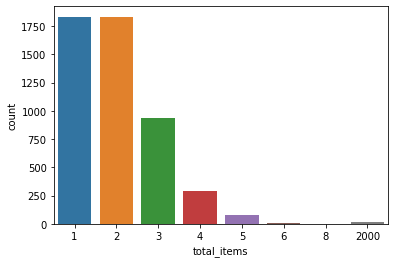

In [ ]:
sns.countplot('total_items',data=data);

## (A) Mistake done in calculation mentioned in the question:

 

**In question we blindly took the total item per order as 1 (or we took the total item as the total number of entries in the dataset)**


**But actually, we can notice from above count plot that total items per order is not 1 everytime, they are also sometimes 2, 3, 4, 5 etc. i.e.** ***we cannot take the total items blindly as 1***

### Actual AOV:

To calculate actual value of AOV per month we should divide total order amount per month by total items per month

In [ ]:
Aov_per_month = pd.DataFrame(data.groupby('created_month').apply(lambda key: key['order_amount'].sum()/key['total_items'].sum()), columns=['AOV per month'])
Aov_per_month

,AOV per month
created_month,
2017-03,357.921522


The above method is the actual value of AOV of the given 30 days 

##(B) What metric would you report for this dataset?

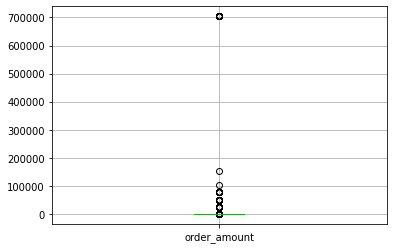

In [ ]:
data.boxplot(column='order_amount')

As we can notice that entire box of the boxplot is along the line, this indicates that there is huge difference between the values of most of data points and the maximum value.

Or we can say that dataset is skewed to the lower values

Therefore, it would be preferable to use that evaluation metric which is not affected by extreme values 

In [ ]:
print("first quartile: ", data.order_amount.quantile(q=0.25))
print("second quartile (Median): ", data.order_amount.quantile(q=0.5))
print("third quartile: ", data.order_amount.quantile(q=0.75))

first quartile:  163.0
second quartile (Median):  284.0
third quartile:  390.0


###Answer: 
And as we can notice that median is not affected much by the outliers, i.e median defines the dataset more accurately than mean, therefore, it would be more wise to use this as the evaluation metric

####**Prefered Evaluation Metric: MEDIAN**

Note: This would be better given that we are taking about single-transaction purchase of shoes

***The method mentioned in (A) i.e finding AOV by the formula is most accurate no matter if the transaction is single or muliple transaction.***

##(C) What is its value?



###Answer:

The median is 284, which is a more reasonable value for our measure of central tendancy than the mean (3145.13) given that we are talking about single-transaction purchases of shoes or else to measure AOV more accurately we can use the formula based method whoose value for given dataset is 357.92

# Question 2

## (a)
SELECT A.ShipperID, COUNT(*) AS "Speedy Express Count" 

FROM Orders A
JOIN Shippers B ON A.ShipperID = B.ShipperID

WHERE B.ShipperName = "Speedy Express"

### Answer: 
ShipperID	Speedy | Express Count

1 | 54

## (b)

SELECT EmployeeID, LastName, MAX(orderCount) AS "MaxEmployeeOrder" 

FROM (SELECT EmployeeID, COUNT(*) AS orderCount FROM Orders GROUP BY EmployeeID) NATURAL JOIN Employees



### Answer:

EmployeeID |	LastName	| MaxEmployeeOrder

4	| Peacock |	40


## (c)
SELECT ProductName, ProductID, MAX(ProductCount) AS "MaxProductCount"

FROM (SELECT ProductName, ProductID, COUNT(*) AS ProductCount

FROM Customers NATURAL JOIN Orders NATURAL JOIN OrderDetails NATURAL JOIN Products

WHERE Country == "Germany"

GROUP BY ProductID)

### Answer:

ProductName |	ProductID |	MaxProductCount

Gorgonzola Telino |	31 |	5

# MetaData Analysis (Extra)

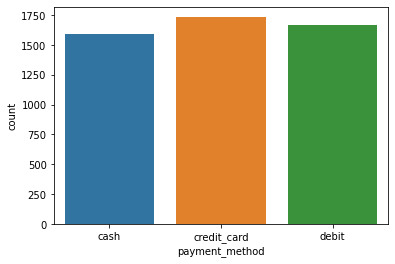

In [33]:
sns.countplot('payment_method',data=data);

## Shop data Analysis

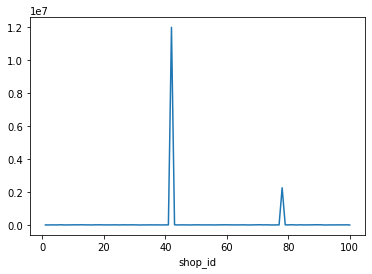

In [34]:
data.groupby('shop_id').apply(lambda key: sum(key.order_amount)).plot();

In [35]:
shop_Data = data.groupby(['shop_id']).agg({'order_amount' : [sum, len, np.median, np.mean]}).rename(columns={'order_amount': 'order amount data'})
shop_Data.head()

order amount data                       
                      sum len median        mean
shop_id                                         
1                   13588  44    316  308.818182
2                    9588  55    188  174.327273
3                   14652  48    296  305.250000
4                   13184  51    256  258.509804
5                   13064  45    284  290.311111

In [36]:
print("Shop with maximum order amount:\n\n")

print(shop_Data[shop_Data.index == shop_Data["order amount data"]["sum"].idxmax()])


print("\n\n\nShop with minimun order amount:\n\n")

print(shop_Data[shop_Data.index == shop_Data["order amount data"]["sum"].idxmin()])

Shop with maximum order amount:


        order amount data                          
                      sum len median           mean
shop_id                                            
42               11990176  51    704  235101.490196



Shop with minimun order amount:


        order amount data                       
                      sum len median        mean
shop_id                                         
92                   6840  42    180  162.857143


In [37]:
print("Shop with maximum number of orders:\n\n")

print(shop_Data[shop_Data.index == shop_Data["order amount data"]["len"].idxmax()])

print("\n\n\nShop with minimun number of orders:\n\n")

print(shop_Data[shop_Data.index == shop_Data["order amount data"]["len"].idxmin()])

Shop with maximum number of orders:


        order amount data                       
                      sum len median        mean
shop_id                                         
53                  14560  68    224  214.117647



Shop with minimun number of orders:


        order amount data                       
                      sum len median        mean
shop_id                                         
38                  13680  35    380  390.857143


## User data analysis:

In [38]:
user_data = data.groupby("user_id").agg({'shop_id': [max, len], 'payment_method': [max]}).rename(columns={'shop_id': 'shop data', 'payment_method': 'payment data'})
user_data.shape

(301, 3)

In [39]:
user_data.head()

shop data     payment data
              max len          max
user_id                           
607            42  17  credit_card
700            95  16        debit
701           100  13        debit
702            96  13        debit
703            95  16        debit

In [40]:
print("User with maximum number of orders:\n\n")

print(user_data[user_data.index == user_data["shop data"]["len"].idxmax()])

print("\n\n\nUser with minimun number of orders:\n\n")

print(user_data[user_data.index == user_data["shop data"]["len"].idxmin()])

User with maximum number of orders:


        shop data     payment data
              max len          max
user_id                           
718            97  28        debit



User with minimun number of orders:


        shop data     payment data
              max len          max
user_id                           
717            83   7        debit


## Order Amount

In [44]:
data.groupby('order_amount').count().sort_values(by='order_amount', ascending=False).head(10)

,order_id,shop_id,user_id,total_items,payment_method,created_at,created_month,created_date
order_amount,,,,,,,,
704000,17,17,17,17,17,17,17,17
154350,1,1,1,1,1,1,1,1
102900,1,1,1,1,1,1,1,1
77175,9,9,9,9,9,9,9,9
51450,16,16,16,16,16,16,16,16
25725,19,19,19,19,19,19,19,19
1760,1,1,1,1,1,1,1,1
1408,2,2,2,2,2,2,2,2
1086,1,1,1,1,1,1,1,1


One thing we can notice from above dataframe is that there is frequent number of orders of the items which are of very high order amount as compared to other. 

In [45]:
data.loc[data['order_amount'].isin([704000, 51450, 25725])].sort_values(by='order_amount', ascending=False)


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,created_month,created_date
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03,2017-03-07
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,2017-03,2017-03-15
2969,2970,42,607,704000,2000,credit_card,2017-03-28 4:00:00,2017-03,2017-03-28
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,2017-03,2017-03-28
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,2017-03,2017-03-28
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,2017-03,2017-03-04
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,2017-03,2017-03-07
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,2017-03,2017-03-12
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,2017-03,2017-03-19
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,2017-03,2017-03-11


From above result we can notice that the order amounts of 704000 occur at the same time each day and between the same store and user.



## Time Series

In [41]:
# Seperating dates from each entry
data['created_date'] = data.created_at.str.split(' ', n=1).str[:1].apply(lambda key: str(key[0]))

In [42]:
# Creating Date - AOV Series

AOV_per_day = pd.DataFrame(data.groupby('created_date').apply(lambda key: key.order_amount.sum() / key.total_items.sum()), columns = ['AOV'])

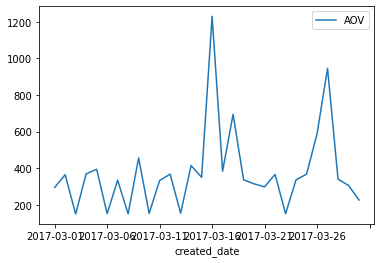

In [43]:
# Date - AOV Plot
AOV_per_day.plot();

###***We can notice the non-stationary seasonality without any trend in the above plot*** 